In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/ProgramData/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


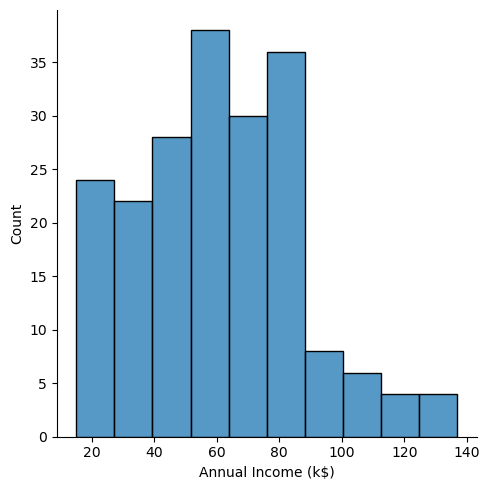

In [6]:
sns.displot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

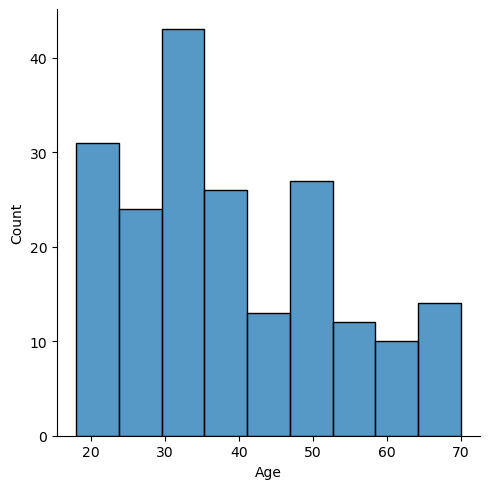

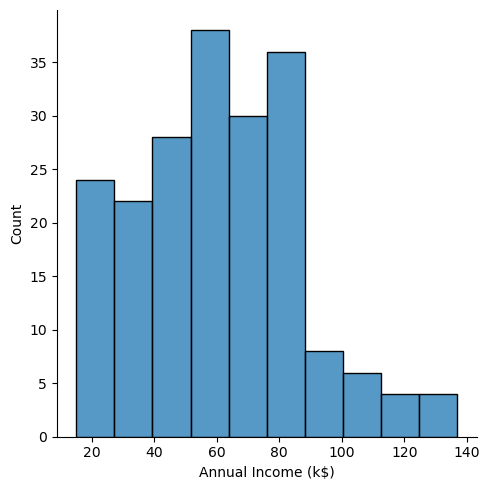

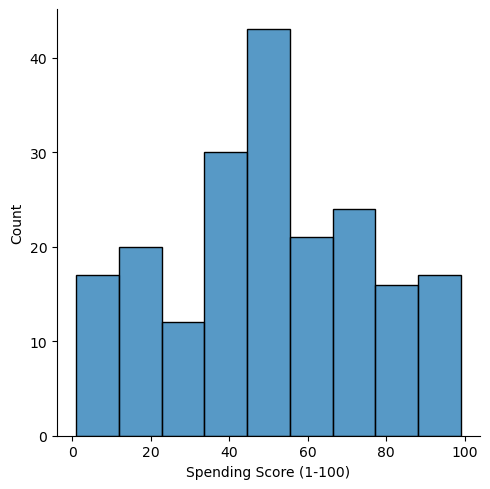

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.show()
    sns.displot(df[i]);
    plt.savefig('C:/ProgramData/clustering_univariate_columns_by_histplot_displot.png')

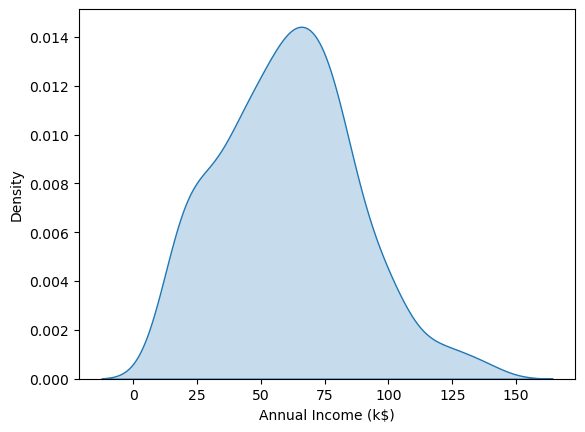

In [9]:
sns.kdeplot(df['Annual Income (k$)'],shade=True);

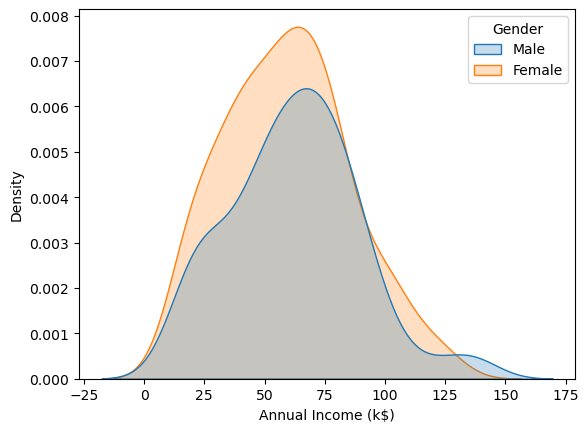

In [10]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')
plt.show()

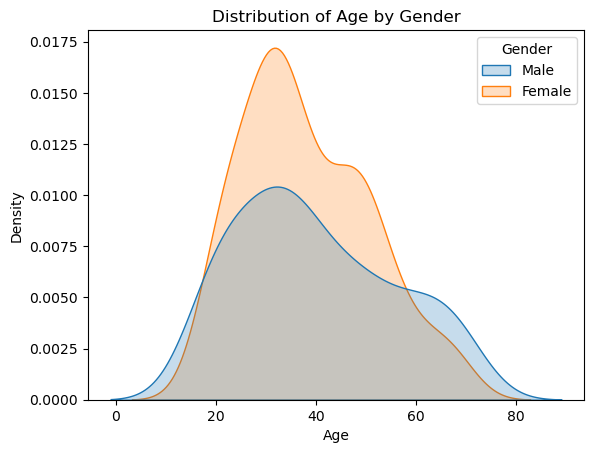

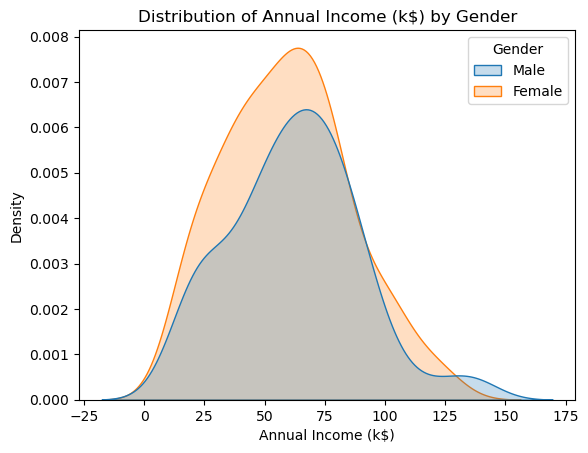

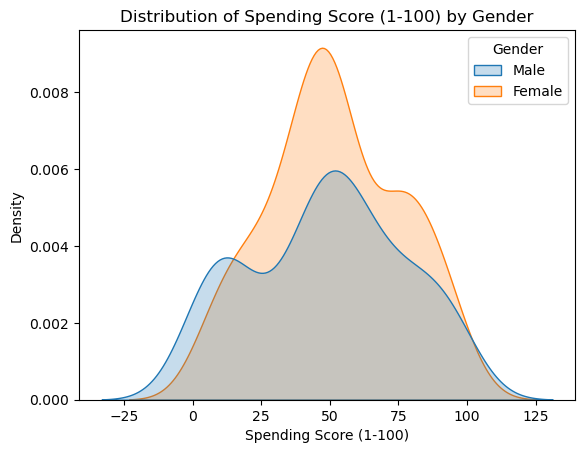

In [11]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')
    plt.title(f'Distribution of {i} by Gender')
    plt.show()

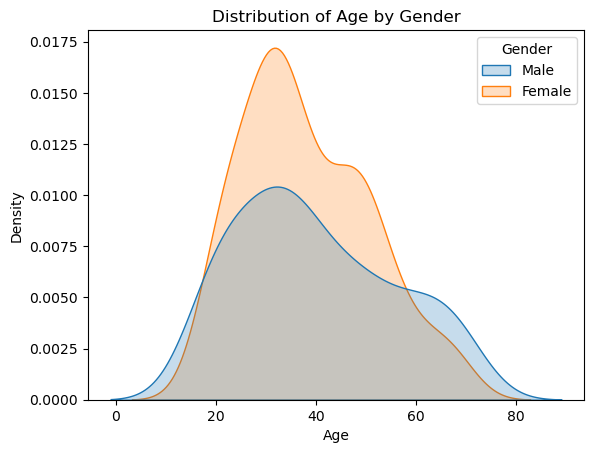

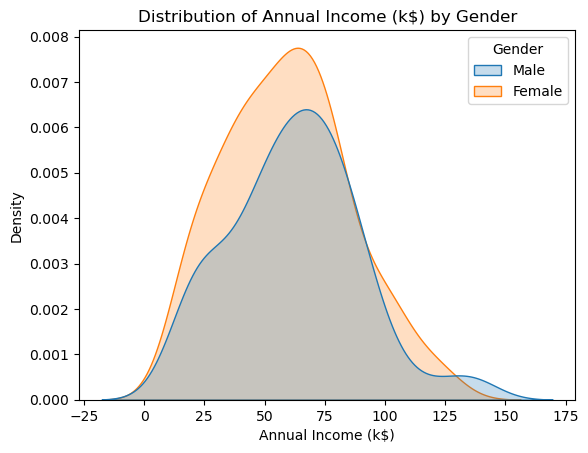

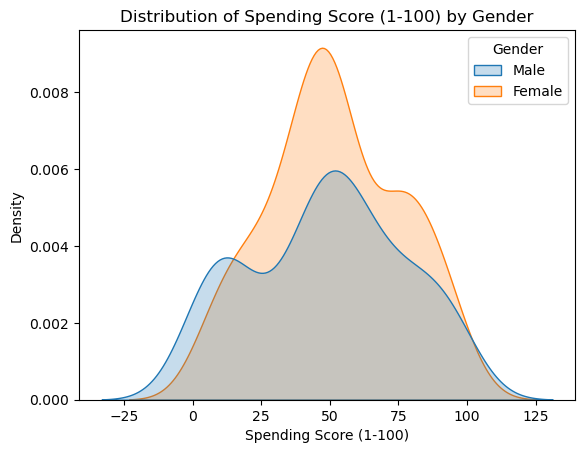

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')
    plt.title(f'Distribution of {i} by Gender')
    
    # Save each plot with a unique filename based on the column name
    plt.savefig(f'C:/ProgramData/{i.replace(" ", "_").replace("(", "").replace(")", "")}_by_gender.png')
    
    plt.show()


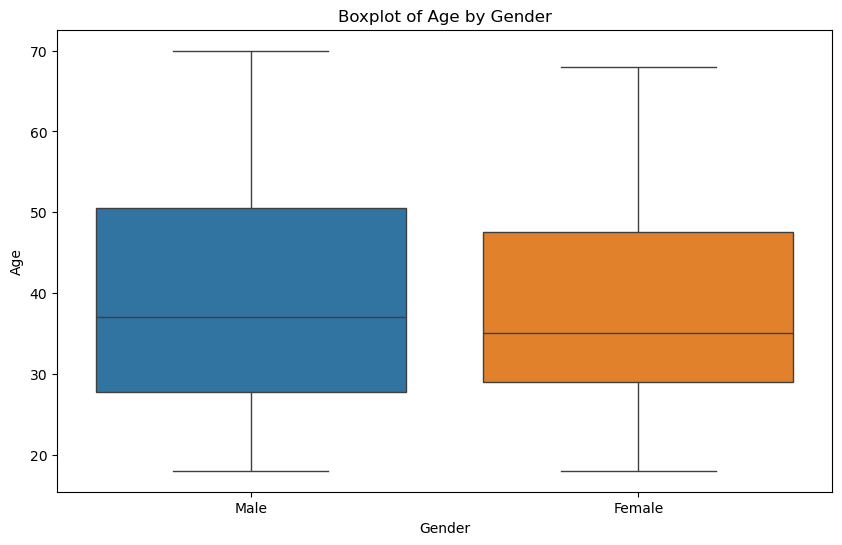

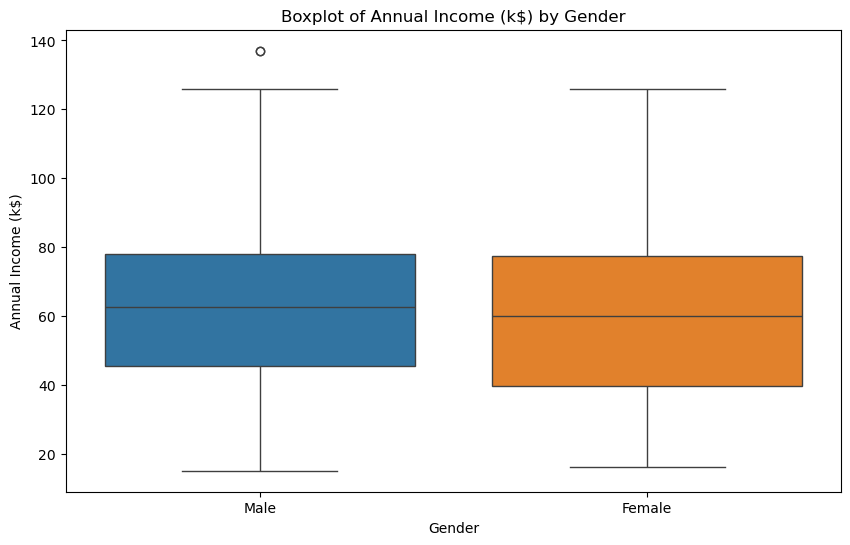

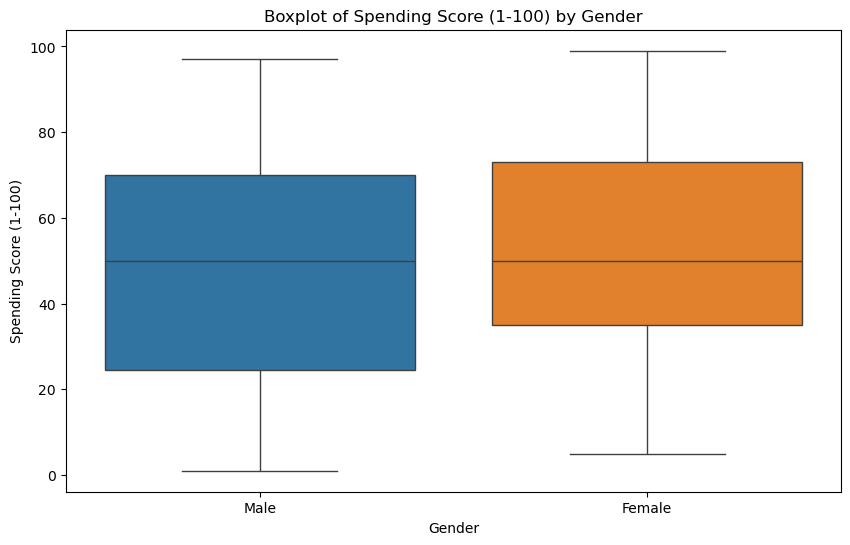

In [13]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Gender', y=i, hue='Gender')
    plt.title(f'Boxplot of {i} by Gender')
    plt.savefig('C:/ProgramData/clustering_univariate_Boxplot.png')
    plt.show()

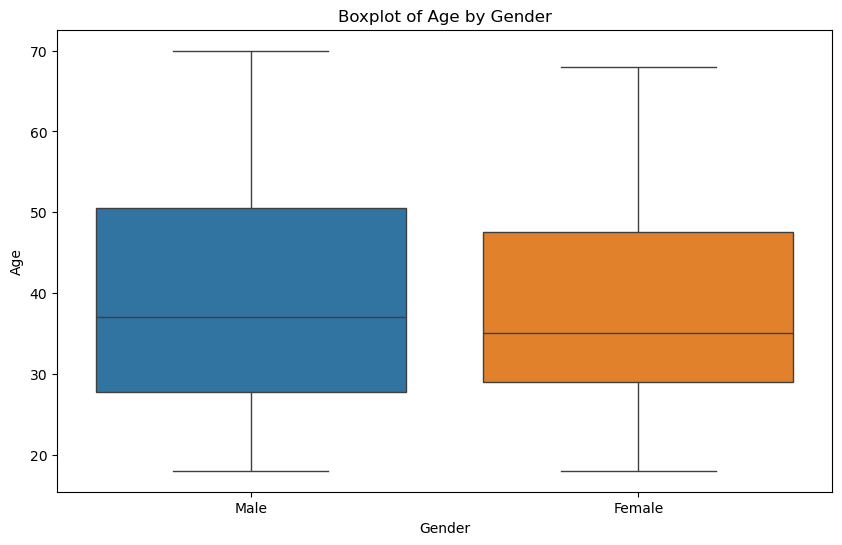

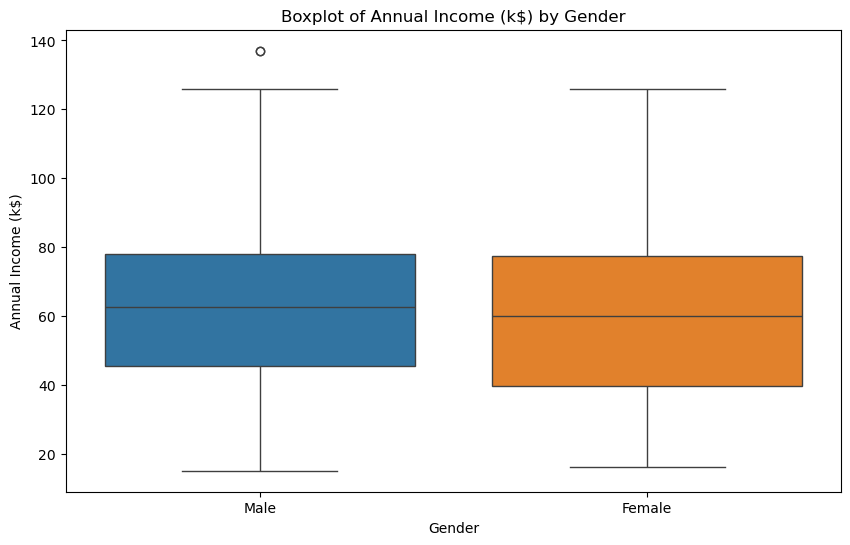

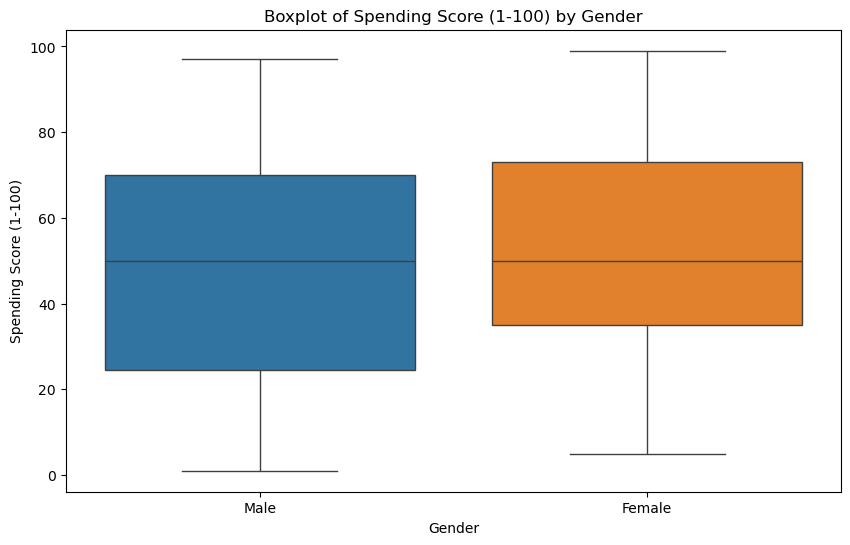

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Gender', y=i, hue='Gender')
    plt.title(f'Boxplot of {i} by Gender')
    
    # Save each plot with a unique filename based on the column name
    plt.savefig(f'C:/ProgramData/{i.replace(" ", "_").replace("(", "").replace(")", "")}_Boxplot_by_gender.png')
    
    plt.show()


In [15]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [16]:
#Bivariate Analysis

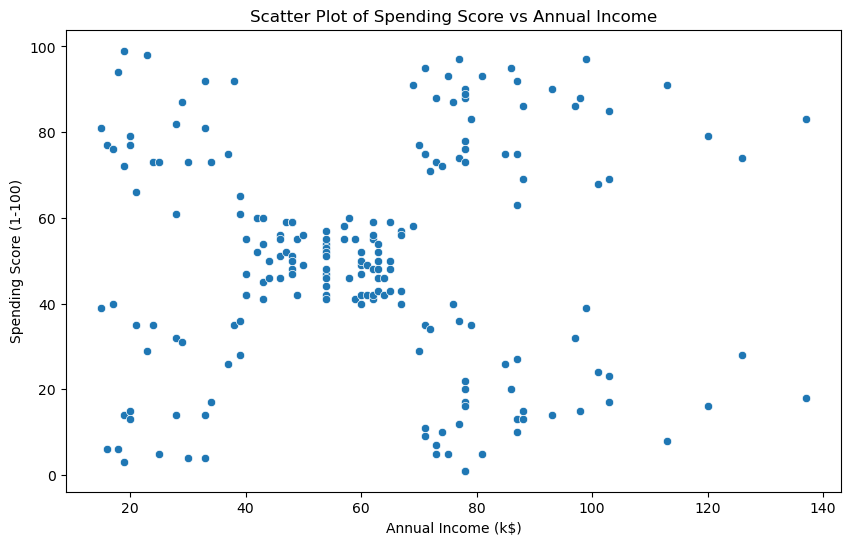

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

# Add a title to the plot
plt.title('Scatter Plot of Spending Score vs Annual Income')

# Save the plot to the specified path
plt.savefig('C:/ProgramData/Scatterplot_Annual_Income_vs_Spending_Score.png')

# Show the plot
plt.show()


In [18]:
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

In [19]:
print(df.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


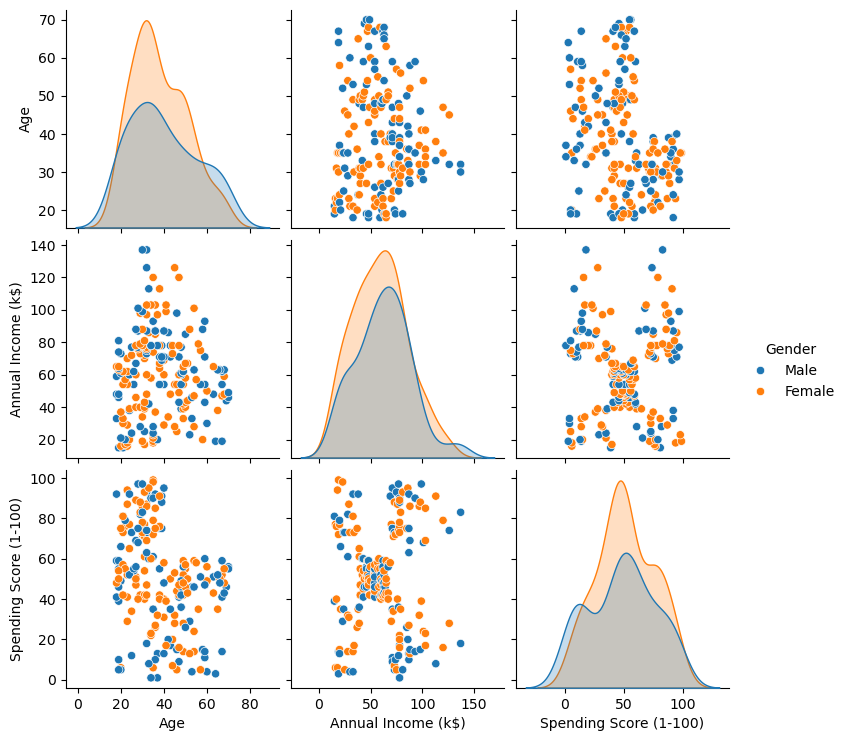

In [20]:
sns.pairplot(df,hue='Gender')
plt.savefig('C:/ProgramData/clustering_univariate_gridview_with_Hue.png')
plt.show()

In [21]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [22]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


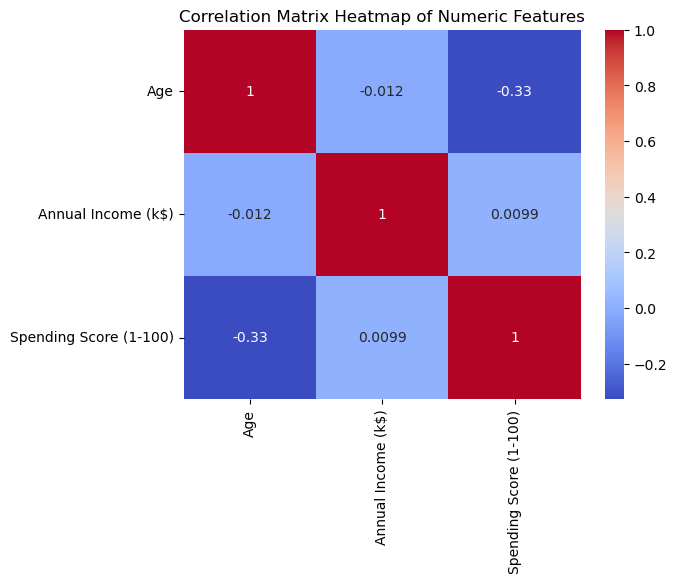

In [23]:
# Select only numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('C:/ProgramData/heatmap_clustering_univariate_correlation_matrix.png')

# Add the title
plt.title('Correlation Matrix Heatmap of Numeric Features')

# Show the plot
plt.show()



In [24]:
# Clustering - Univariate, Bivariate, Multivariate

In [25]:
clustering1 = KMeans(n_clusters=3)

In [26]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [27]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [28]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [29]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [30]:
clustering1.inertia_

25640.45778439684

In [31]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [32]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13308.108021390362,
 8667.679614837507,
 5081.484660267268,
 4274.0055555555555,
 2871.661599511601,
 2517.2670940170938,
 1857.5980158730154]

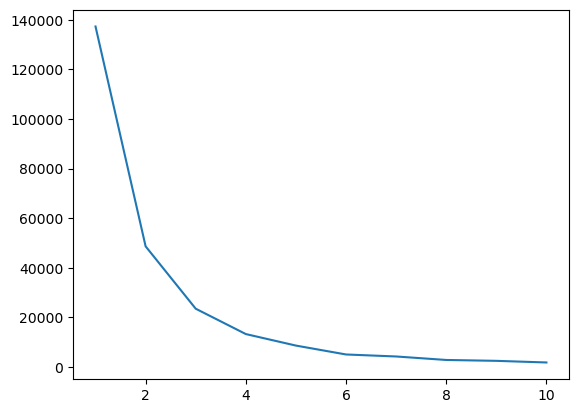

In [33]:
plt.plot(range(1,11),inertia_scores)

In [34]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [35]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [36]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [37]:
clustering2.inertia_

44454.476479679724

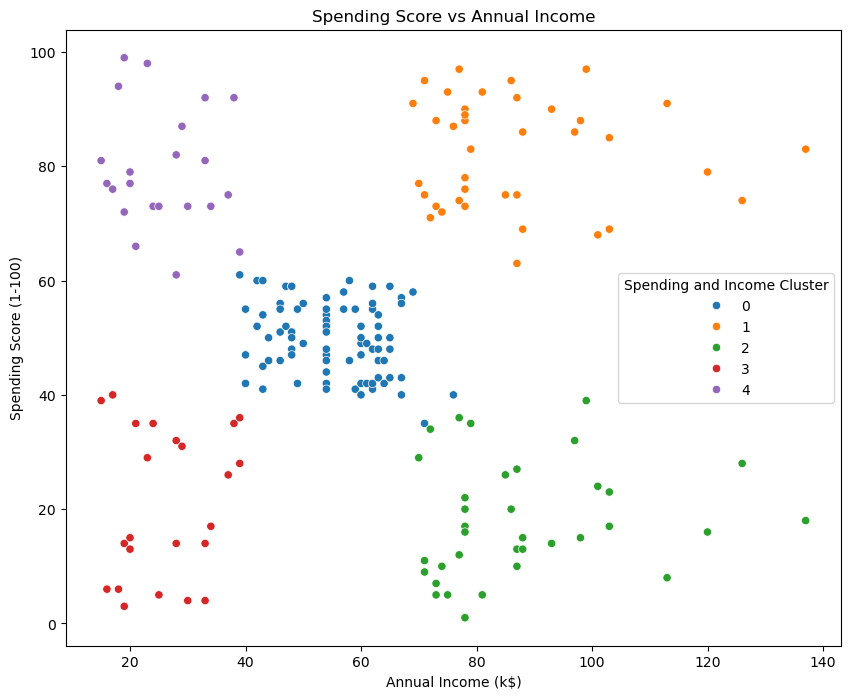

In [38]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('C:/ProgramData/Spending_Score against Annual Income clustering_Bivariate.png')
plt.title('Spending Score vs Annual Income')
plt.show()

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               2   
1    Male   21                  15                      81               2   
2  Female   20                  16                       6               2   
3  Female   23                  16                      77               2   
4  Female   31                  17                      40               2   

   Spending and Income Cluster  
0                            3  
1                            4  
2                            3  
3                            4  
4                            3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       200 non-null    object
 1   Age                          200 non-null    int64 
 

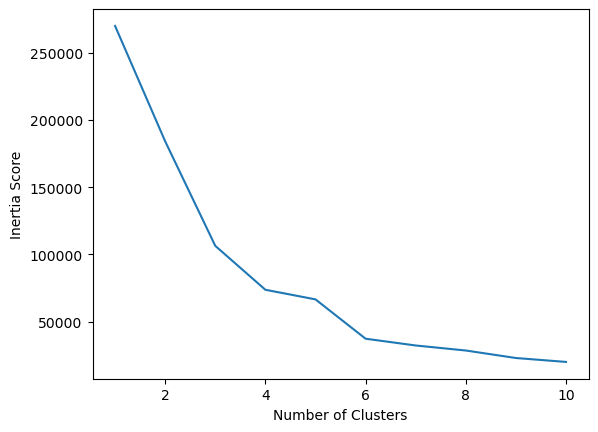

In [39]:
# Check the DataFrame structure
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Initialize KMeans with a specific number of clusters, for example, 5
clustering2 = KMeans(n_clusters=5)

# Fit the model
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Get the cluster labels
print(clustering2.labels_)

# Add cluster labels to the DataFrame
df['Spending and Income Cluster'] = clustering2.labels_

# Check the DataFrame to see if the column was added
print(df.head())

# Group by the new cluster and calculate mean values
print(df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Plot the inertia scores to find the optimal number of clusters
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1, 11), inertia_scores2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()

In [40]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

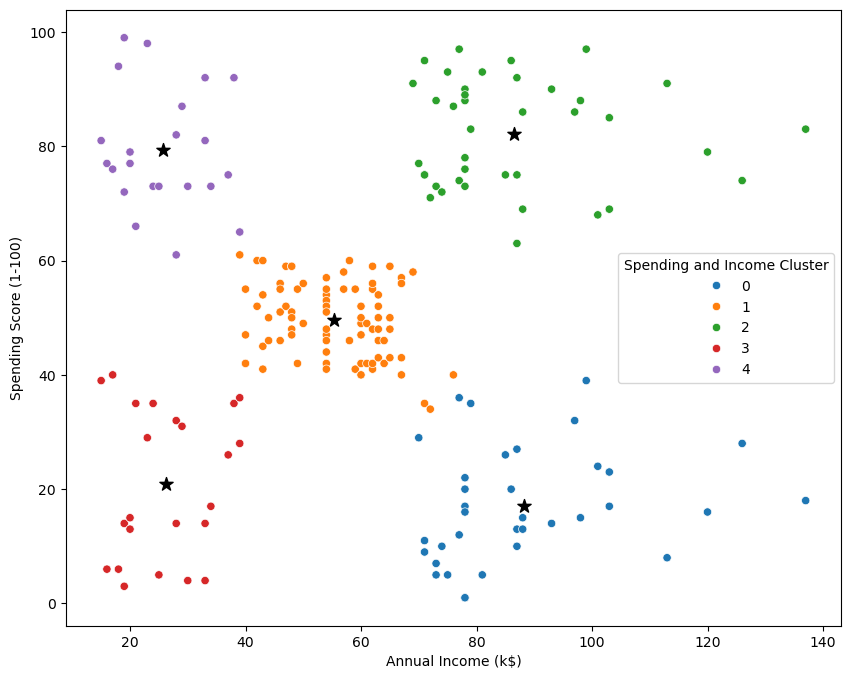

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('C:/ProgramData/clustering_bivariate.png')

In [42]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [43]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [44]:
#Multivariate clustering
from sklearn.preprocessing import StandardScaler

In [45]:
scale = StandardScaler()

In [46]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [47]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,3,True
1,21,15,81,2,4,True
2,20,16,6,2,3,False
3,23,16,77,2,4,False
4,31,17,40,2,3,False


In [48]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [49]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [50]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


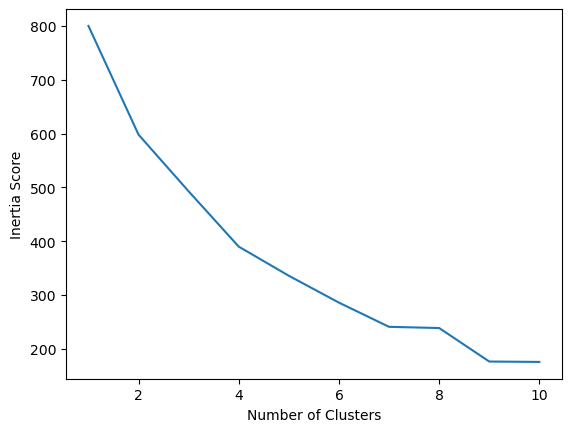

In [51]:
# Plot the inertia scores to find the optimal number of clusters
inertia_scores3 = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1, 11), inertia_scores3)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()

In [52]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,2
196,Female,45,126,28,1,0
197,Male,32,126,74,1,2
198,Male,32,137,18,1,0


In [53]:
# Assuming original_df is your original DataFrame with CustomerID
original_df = pd.read_csv("C:/ProgramData/Mall_Customers.csv")

# Ensure the original DataFrame contains the CustomerID column
if 'CustomerID' in original_df.columns:
    # Merge the CustomerID column back into your current DataFrame using the index
    df = df.merge(original_df[['CustomerID']], left_index=True, right_index=True)

# Reorder the columns to have CustomerID as the first column
df = df[['CustomerID'] + [col for col in df.columns if col != 'CustomerID']]

# Display the DataFrame to confirm
print(df)

# Save the DataFrame to a CSV file
df.to_csv('C:/ProgramData/Clustering.csv', index=False)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Income Cluster  Spending and Income Cluster  
0                 2                 